In [1]:
import pickle

# Open the pickle file in binary mode
with open('keyword_based_filtered_articles_using_re.pkl', 'rb') as file:
    # Load the object from the pickle file
    df = pickle.load(file)

In [2]:
#!pip install vaderSentiment

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [4]:
import multiprocessing

num_processors = multiprocessing.cpu_count()
print(f'Available CPUs: {num_processors}')

Available CPUs: 32


### NaiveBayesAnalyzer

In [8]:
#import nltk
#nltk.download('movie_reviews')

In [9]:
# NaiveBayesAnalyzer is SLOW, taking a small sample of Tweets
#df = df.copy()
#df = df.sample(n=100, random_state=12345)
#
#df['sentiment_class'] = df.apply(lambda x: TextBlob(x['clean_text'], analyzer=NaiveBayesAnalyzer()).sentiment.classification, axis=1)
#df['sentiment_prob_pos'] = df.apply(lambda x: TextBlob(x['clean_text'], analyzer=NaiveBayesAnalyzer()).sentiment.p_pos, axis=1)
#df['sentiment_prob_neg'] = df.apply(lambda x: TextBlob(x['clean_text'], analyzer=NaiveBayesAnalyzer()).sentiment.p_neg, axis=1)
#df['sentiment_class'] = np.where(df['sentiment_prob_pos']==0.5, 'neu', tweets['sentiment_class'])
#df[['clean_text', 'sentiment_class', 'sentiment_prob_pos', 'sentiment_prob_neg']].head(5)

In [10]:
#from tqdm import tqdm
#from textblob import TextBlob
#from textblob.sentiments import NaiveBayesAnalyzer
#import numpy as np
#
## NaiveBayesAnalyzer is SLOW, taking a small sample of Tweets
#df = df.copy()
#
## Create progress bar
#total_rows = len(df)
#with tqdm(total=total_rows, desc='Processing') as pbar:
#    for index, row in df.iterrows():
#        clean_text = row['clean_text']
#        blob = TextBlob(clean_text, analyzer=NaiveBayesAnalyzer())
#        
#        # Calculate sentiment attributes
#        sentiment_class = blob.sentiment.classification
#        sentiment_prob_pos = blob.sentiment.p_pos
#        sentiment_prob_neg = blob.sentiment.p_neg
#        
#        # Update dataframe
#        df.at[index, 'sentiment_class'] = sentiment_class
#        df.at[index, 'sentiment_prob_pos'] = sentiment_prob_pos
#        df.at[index, 'sentiment_prob_neg'] = sentiment_prob_neg
#        
#        # Update progress bar
#        pbar.update(1)
#
## Update 'neu' sentiment class where sentiment_prob_pos is 0.5
#df['sentiment_class'] = np.where(df['sentiment_prob_pos'] == 0.5, 'neu', df['sentiment_class'])
#
## Print the head of the dataframe
#print(df[['clean_text', 'sentiment_class', 'sentiment_prob_pos', 'sentiment_prob_neg']].head(5))
#

In [11]:
#df[['clean_text', 'sentiment_class', 'sentiment_prob_pos', 'sentiment_prob_neg']].head(5)

In [12]:
#sorted_df = df[['clean_text', 'sentiment_class', 'sentiment_prob_pos', 'sentiment_prob_neg']].sort_values('sentiment_prob_neg', ascending=False)
#sorted_df.head(5)

### Sentiment Analysis Using Trained Yelp Model

In [13]:
import sys
print(sys.version)

3.10.10 | packaged by conda-forge | (main, Mar 24 2023, 20:08:06) [GCC 11.3.0]


In [14]:
import sklearn
import os
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn import metrics

from joblib import dump, load

In [15]:
os.makedirs('/home/jupyter/yelp', exist_ok=True)
os.makedirs('/home/jupyter/data/yelp/yelp_model', exist_ok=True)

In [16]:
directory = 'https://storage.googleapis.com/msca-bdp-data-open/yelp/'
fileName = 'yelp_train_sentiment.json'

path = directory + fileName

In [17]:
%%time

yelp = pd.read_json(path, orient='records', lines=True)
yelp.shape

CPU times: user 1.55 s, sys: 565 ms, total: 2.12 s
Wall time: 2.4 s


(255717, 3)

In [18]:
pd.set_option('display.max_colwidth', 200)

In [19]:
# examine the first 5 rows
yelp.head(5)

,text,label,lang
0,"I love Deagan's. I do. I really do. The atmosphere is cozy and festive. The shrimp tacos and house fries are my standbys. The fries are sometimes good and sometimes great, and the spicy dipping sa...",1,en
1,I love the classes at this gym. Zumba and. Radio Hip Hop are my favorite. This is such a great fun and I love that it is so reasonably priced!,1,en
2,The tables and floor were dirty. I was the only customer on a Saturday nite and the person working the counter ignored me I had a corned beef sandwich. I took three bites and threw it in the trash,0,en
3,"I had an oil change at the 15515 N Scottsdale Road location. When the car was delivered to me, there were two engine warning lights on that had not been on when I drove the car in. The technicia...",0,en
4,The absolute WORST apartment complex I have ever lived in. Moved here from out of state. Hoped to find a decently priced apartment until I got myself settled in. Wow this place has been trash. Lan...,0,en


In [20]:
# define X and y
X = yelp['text']
y = yelp['label']
print(X.shape)
print(y.shape)

(255717,)
(255717,)


In [21]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(191787,)
(63930,)
(191787,)
(63930,)


### Support Vector Machine

In [22]:
pipe_svm = make_pipeline(
    CountVectorizer(lowercase=False, stop_words='english', ngram_range=(1,3)),
    SGDClassifier(max_iter=100, tol=None)
)

In [23]:
%time pipe_svm.fit(X_train, y_train)

CPU times: user 2min 20s, sys: 5.48 s, total: 2min 25s
Wall time: 2min 21s


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(lowercase=False, ngram_range=(1, 3),
                                 stop_words='english')),
                ('sgdclassifier', SGDClassifier(max_iter=100, tol=None))])

In [24]:
y_pred = pipe_svm.predict(X_test)

In [25]:
# calculate accuracy of class predictions
print(metrics.accuracy_score(y_test, y_pred))

0.9733771312372907


In [26]:
# calculate precision and recall
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     32016
           1       0.97      0.97      0.97     31914

    accuracy                           0.97     63930
   macro avg       0.97      0.97      0.97     63930
weighted avg       0.97      0.97      0.97     63930



In [27]:
%time dump(pipe_svm, "/home/jupyter/data/yelp/yelp_model/svm_large.joblib")

CPU times: user 1min 14s, sys: 1.7 s, total: 1min 15s
Wall time: 1min 16s


['/home/jupyter/data/yelp/yelp_model/svm_large.joblib']

### Applying this Trained Yelp Model to Our Dataset

In [28]:
%time clf_large = load('/home/jupyter/data/yelp/yelp_model/svm_large.joblib')

CPU times: user 37.5 s, sys: 1.77 s, total: 39.3 s
Wall time: 39.3 s


In [29]:
import pickle

# Open the pickle file in binary mode
with open('keyword_based_filtered_articles_using_re.pkl', 'rb') as file:
    # Load the object from the pickle file
    filtered_news = pickle.load(file)
df_news = filtered_news

In [30]:
df_news.shape

(134039, 6)

In [31]:
%time y_pred = clf_large.predict(df_news['clean_text'])
y_pred_class = np.where(y_pred < 0.5, 'Negative', 'Positive')
y_pred_prob = clf_large.decision_function(df_news['clean_text'])

CPU times: user 3min 3s, sys: 622 ms, total: 3min 3s
Wall time: 3min 3s


In [39]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134039 entries, 0 to 200329
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   url         134039 non-null  object
 1   date        134039 non-null  object
 2   language    134039 non-null  object
 3   title       134039 non-null  object
 4   text        134039 non-null  object
 5   clean_text  134039 non-null  object
dtypes: object(6)
memory usage: 7.2+ MB


In [40]:
%%time

import pandas as pd
import numpy as np

# Apply the sigmoid function to obtain valid probabilities
prob_pos = 1 / (1 + np.exp(-y_pred_prob))
prob_neg = 1 - prob_pos

# Create the DataFrame
data = {
    'date': df_news['date'],
    'title': df_news['title'],
    'clean_text': df_news['clean_text'],
    'sentiment_type': y_pred_class,
    'prob_neg': prob_neg,
    'prob_pos': prob_pos
}

df_result = pd.DataFrame(data)

CPU times: user 29.5 ms, sys: 3.91 ms, total: 33.4 ms
Wall time: 31.9 ms


In [41]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', None)

In [42]:
df_result.head(10)

,date,title,clean_text,sentiment_type,prob_neg,prob_pos
0,2021-03-18,Artificial intelligence improves parking efficiency in Chinese cities - People's Daily Online,"Some urban areas of the city started to use ETC system for roadside parking spaces since July , . (People’s Daily Online/Li Wenming) Thanks to the application of an artificial intelligence (AI)-em...",Negative,0.660940,0.339060
2,2021-03-26,"Forget ML, AI and Industry 4.0 – obsolescence should be your focus - 26 February 2021 - Test & Rework Solutions - Dataweek",The world entered a new era of accelerated transformation in the last eighteen months that will continue to evolve and press forward for years to come. Most businesses are playing catch-up trying ...,Positive,0.255745,0.744255
3,2021-03-10,Strategy Analytics: 71% of Smartphones Sold Globally in 2021 will be AI Powered – Consumer Electronics Net,"AI is used in various functions inside smartphones such as intelligent power optimization, imaging, virtual assistants, and to enhance device performance. The report highlights the fact that AI ha...",Positive,0.342625,0.657375
7,2021-02-25,MulticoreWare Inc. Becomes CEVA’s Trusted Partner for Imaging & Computer Vision – Consumer Electronics Net,MulticoreWare Inc. Becomes CEVA’s Trusted Partner for Imaging & Computer Vision – Consumer Electronics Net Skip to content Consumer Electronics Net Primary Menu Consumer Electronics Net Search for...,Negative,0.669762,0.330238
9,2020-06-14,"Artificial Intelligence In Behavioral And Mental Health Care Market to Witness Astonishing Growth by 2026 Focusing on Leading Players – AdvancedMD , Cerner , Core Solutions , Credible Behavioral H...","It uses several approaches for analyzing the data of target market such as primary and secondary research methodologies. It includes investigations based on historical records, current statistics,...",Positive,0.081610,0.918390
10,2020-07-10,"AI/ Machine Learning Market 2020 Expected to Reach $XX Million by 2024 – IBM, BAIDU, SOUNDHOUND, ZEBRA MEDICAL VISION, PRISMA, IRIS AI – 3w Market News Reports",These vital market oriented details are highly crucial to overcome cut throat competition and all the growth oriented practices typically embraced by frontline players in the AI/ Machine Learning ...,Negative,0.762503,0.237497
11,2020-03-16,"According to Latest Report on Machine Learning Courses Market to Grow with an Impressive CAGR: Top Key Players – EdX, Ivy Professional School, NobleProg, etc. – 3rd Watch News","According to Latest Report on Machine Learning Courses Market to Grow with an Impressive CAGR: Top Key Players – EdX, Ivy Professional School, NobleProg, etc. – rd Watch News Contact Us About Us r...",Positive,0.017054,0.982946
13,2021-03-26,Apple bought more AI companies than anyone else between 2016 and 2020 - 9to5Mac,"th : pm PT @filipeesposito Once in a while, Apple announces the acquisition of another company or startup, but now, new research from GlobalData shows that Apple is in fact investing heavily in ...",Positive,0.070048,0.929952
14,2023-04-06,Video Trump deepfakes on social media prompt warnings of AI risks - ABC News,Video Trump deepfakes on social media prompt warnings of AI risks - ABC News ABC in AmericaInterest Successfully AddedWe'll notify you here with news aboutTurn on desktop notifications for breakin...,Negative,0.596936,0.403064
15,2020-02-19,"EU imposes sweeping regulations on facial recognition, Artificial Intelligence Video - ABC News","EU imposes sweeping regulations on facial recognition, Artificial Intelligence Video - ABC News Sections Sections Top Stories Video Live U.S. Politics Elections International Entertainment Busine...",Negative,0.985797,0.014203


In [43]:
df_result['sentiment_type'].value_counts()

sentiment_type
Negative    72069
Positive    61970
Name: count, dtype: int64

In [44]:
import pandas as pd
import pickle

# Write the filtered_news dataframe to a pickle filev 
df_result.to_pickle('yelp_cust_lex_df.pkl')

In [77]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134039 entries, 0 to 200329
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            134039 non-null  datetime64[ns]
 1   title           134039 non-null  object        
 2   clean_text      134039 non-null  object        
 3   sentiment_type  134039 non-null  object        
 4   prob_neg        134039 non-null  float64       
 5   prob_pos        134039 non-null  float64       
 6   year            134039 non-null  int32         
 7   month           134039 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(2), object(3)
memory usage: 8.2+ MB


In [199]:
df = df_result

In [172]:
df['date'] = pd.to_datetime(df['date'])

In [131]:
df.head(2)

,title,clean_text,sentiment_type,prob_neg,prob_pos,year,month,date
date,,,,,,,,
2021-03-18,Artificial intelligence improves parking efficiency in Chinese cities - People's Daily Online,"Some urban areas of the city started to use ETC system for roadside parking spaces since July , . (People’s Daily Online/Li Wenming) Thanks to the application of an artificial intelligence (AI)-em...",Negative,0.660940,0.339060,2021,3,2021-03-18
2021-03-26,"Forget ML, AI and Industry 4.0 – obsolescence should be your focus - 26 February 2021 - Test & Rework Solutions - Dataweek",The world entered a new era of accelerated transformation in the last eighteen months that will continue to evolve and press forward for years to come. Most businesses are playing catch-up trying ...,Positive,0.255745,0.744255,2021,3,2021-03-26


In [132]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [133]:
df.head(2)

,title,clean_text,sentiment_type,prob_neg,prob_pos,year,month,date
date,,,,,,,,
2021-03-18,Artificial intelligence improves parking efficiency in Chinese cities - People's Daily Online,"Some urban areas of the city started to use ETC system for roadside parking spaces since July , . (People’s Daily Online/Li Wenming) Thanks to the application of an artificial intelligence (AI)-em...",Negative,0.660940,0.339060,2021,3,2021-03-18
2021-03-26,"Forget ML, AI and Industry 4.0 – obsolescence should be your focus - 26 February 2021 - Test & Rework Solutions - Dataweek",The world entered a new era of accelerated transformation in the last eighteen months that will continue to evolve and press forward for years to come. Most businesses are playing catch-up trying ...,Positive,0.255745,0.744255,2021,3,2021-03-26


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 134039 entries, 2021-03-18 to 2020-12-22
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   title           134039 non-null  object        
 1   clean_text      134039 non-null  object        
 2   sentiment_type  134039 non-null  object        
 3   prob_neg        134039 non-null  float64       
 4   prob_pos        134039 non-null  float64       
 5   year            134039 non-null  int32         
 6   month           134039 non-null  int32         
 7   date            134039 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int32(2), object(3)
memory usage: 8.2+ MB


In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
# Filter the data for the particular item
filtered_df_pos = df[df['sentiment_type'] == 'Positive']
filtered_df_neg = df[df['sentiment_type'] == 'Negative']

# Group by year and count occurrences of the item
grouped_df_pos = filtered_df_pos.groupby('year').size().reset_index(name='count')
grouped_df_neg = filtered_df_neg.groupby('year').size().reset_index(name='count')

In [137]:
grouped_df = pd.concat([grouped_df_pos, grouped_df_neg['count']], axis=1)

In [138]:
grouped_df.columns = ['year', 'pos_cnt', 'neg_cnt']
grouped_df.head()

,year,pos_cnt,neg_cnt
0,2020,12101,13809
1,2021,16128,16920
2,2022,20283,18952
3,2023,13458,22388


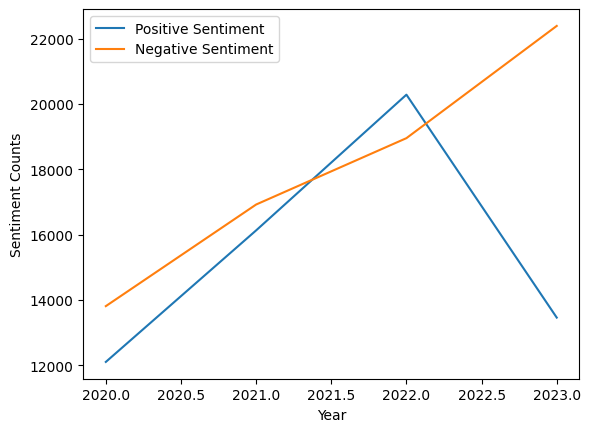

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(data=grouped_df, x='year', y='pos_cnt', label='Positive Sentiment')
sns.lineplot(data=grouped_df,x='year',y='neg_cnt',  label='Negative Sentiment')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Sentiment Counts')
plt.show()

In [203]:
df = df_result
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 134039 entries, 2021-03-18 to 2020-12-22
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   title           134039 non-null  object        
 1   clean_text      134039 non-null  object        
 2   sentiment_type  134039 non-null  object        
 3   prob_neg        134039 non-null  float64       
 4   prob_pos        134039 non-null  float64       
 5   year            134039 non-null  int32         
 6   month           134039 non-null  int32         
 7   date            134039 non-null  datetime64[ns]
 8   date_formatted  134039 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int32(2), object(3)
memory usage: 9.2+ MB


In [212]:
with open('sent_yelp_scores.pkl', 'wb') as f:
    pickle.dump(df, f)

In [204]:
import pandas as pd

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])
df['date_formatted'] = df['date']
# Set 'date' as the index
df = df.set_index('date')

# Resample on a weekly basis and calculate the mean of 'prob_pos'
weekly_avg_prob_pos = df['prob_pos'].resample('W').mean()

# Reset the index to convert it back to a regular column
weekly_avg_prob_pos = weekly_avg_prob_pos.reset_index()

In [205]:
weekly_avg_prob_pos.head(3)

,date,prob_pos
0,2020-01-05,0.392245
1,2020-01-12,0.502910
2,2020-01-19,0.448531


In [176]:
# Resample on a weekly basis and calculate the mean of 'prob_pos'
weekly_avg_prob_neg= df['prob_neg'].resample('W').mean()

# Reset the index to convert it back to a regular column
weekly_avg_prob_neg = weekly_avg_prob_neg.reset_index()

In [177]:
weekly_avg_prob_neg.head(3)

,date,prob_neg
0,2020-01-05,0.607755
1,2020-01-12,0.497090
2,2020-01-19,0.551469


In [178]:
grouped_df_score = pd.concat([weekly_avg_prob_pos, weekly_avg_prob_neg['prob_neg']], axis=1)

In [179]:
grouped_df_score.columns = ['year', 'pos_avg', 'neg_avg']
grouped_df_score.head()

,year,pos_avg,neg_avg
0,2020-01-05,0.392245,0.607755
1,2020-01-12,0.502910,0.497090
2,2020-01-19,0.448531,0.551469
3,2020-01-26,0.430956,0.569044
4,2020-02-02,0.469614,0.530386


In [181]:
grouped_df_score['year_int'] = grouped_df_score['year'].dt.year  # Extract the year as an integer

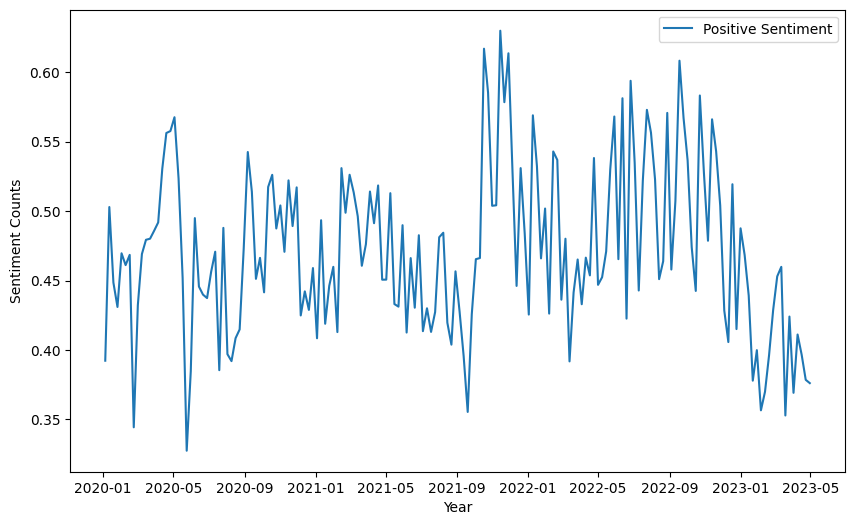

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 6))  # Adjust the width and height as desired

# Create the line plot
sns.lineplot(data=grouped_df_score, x='year', y='pos_avg', label='Positive Sentiment')
#sns.lineplot(data=grouped_df_score, x='year', y='neg_avg', label='Negative Sentiment')

# Set the legend, x-axis label, and y-axis label
plt.legend()
plt.xlabel('Year')
plt.ylabel('Sentiment Counts')

# Show the plot
plt.show()

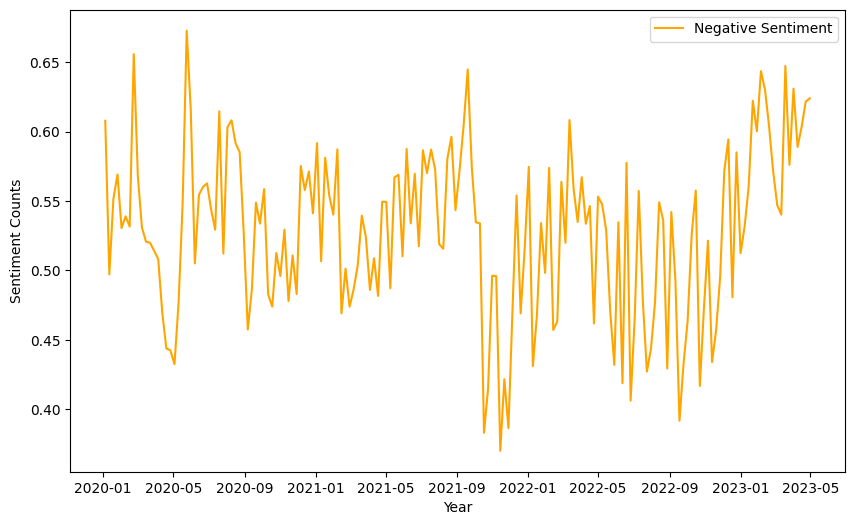

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 6))  # Adjust the width and height as desired

# Create the line plot with orange color
sns.lineplot(data=grouped_df_score, x='year', y='neg_avg', label='Negative Sentiment', color='orange')

# Set the legend, x-axis label, and y-axis label
plt.legend()
plt.xlabel('Year')
plt.ylabel('Sentiment Counts')

# Show the plot
plt.show()